In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"]=(20,10)

In [4]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

pd.options.display.float_format = '{:.2f}'.format

import warnings                 # to deal with warning messages
warnings.filterwarnings('ignore')

Read data

In [6]:
df=pd.read_csv("/Users/raghul/Desktop/pandas_project/chennai housing/Chennai.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.00,1.00,3,AbNormal,Yes,...,AllPub,Paved,A,4.00,3.90,4.90,4.33,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.00,1.00,5,AbNormal,No,...,AllPub,Gravel,RH,4.90,4.20,2.50,3.77,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.00,1.00,3,AbNormal,Yes,...,ELO,Gravel,RL,4.10,3.80,2.20,3.09,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.00,2.00,5,Family,No,...,NoSewr,Paved,I,4.70,3.90,3.60,4.01,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.00,1.00,3,AbNormal,Yes,...,AllPub,Gravel,C,3.00,2.50,4.10,3.29,237000,74063,7406250


1. EDA(exploratory data analysis)

In [7]:
df1=df.drop(['QS_OVERALL','QS_BEDROOM','QS_BATHROOM','QS_ROOMS','MZZONE'],axis='columns')
df1.head() # dropping unnecessary columns

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.00,1.00,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.00,1.00,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.00,1.00,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.00,2.00,5,Family,No,18-03-1988,Others,NoSewr,Paved,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.00,1.00,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,237000,74063,7406250


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  REG_FEE        7109 non-null   int64  
 15  COMMIS         7109 non-null   int64  
 16  SALES_PRICE    7109 non-null   int64  
dtypes: float64(2), int64(6), object(9)
memory usage: 944

In [9]:
df1.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [15]:
df2=df1.dropna() #dropping null rows
df2.isnull().sum() 

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [10]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [16]:
df2.AREA.replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True) # combining typos
df2.AREA.replace('Karapakkam','Karapakam',inplace=True)
df2.AREA.replace('Adyr','Adyar',inplace=True)
df2.AREA.replace('Velchery','Velachery',inplace=True)
df2.AREA.replace(['Chormpet','Chrmpet','Chrompt'],'Chrompet',inplace=True)
df2.AREA.replace('KKNagar','KK Nagar',inplace=True)
df2.AREA.replace('TNagar','T Nagar',inplace=True)
df2.SALE_COND.replace('Ab Normal','AbNormal',inplace=True)
df2.SALE_COND.replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df2.SALE_COND.replace('AdjLand','Adj Land',inplace=True)
df2.PARK_FACIL.replace('Noo','No',inplace=True)
df2.BUILDTYPE.replace('Comercial','Commercial',inplace=True)
df2.BUILDTYPE.replace('Other','Others',inplace=True)
df2.UTILITY_AVAIL.replace('NoSewr','NoSeWa',inplace=True)
df2.UTILITY_AVAIL.replace('AllPub','All Pub',inplace=True)
df2.STREET.replace('Pavd','Paved',inplace=True)
df2.STREET.replace('NoAccess','No Access',inplace=True)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7103 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7103 non-null   object 
 1   AREA           7103 non-null   object 
 2   INT_SQFT       7103 non-null   int64  
 3   DATE_SALE      7103 non-null   object 
 4   DIST_MAINROAD  7103 non-null   int64  
 5   N_BEDROOM      7103 non-null   float64
 6   N_BATHROOM     7103 non-null   float64
 7   N_ROOM         7103 non-null   int64  
 8   SALE_COND      7103 non-null   object 
 9   PARK_FACIL     7103 non-null   object 
 10  DATE_BUILD     7103 non-null   object 
 11  BUILDTYPE      7103 non-null   object 
 12  UTILITY_AVAIL  7103 non-null   object 
 13  STREET         7103 non-null   object 
 14  REG_FEE        7103 non-null   int64  
 15  COMMIS         7103 non-null   int64  
 16  SALES_PRICE    7103 non-null   int64  
dtypes: float64(2), int64(6), object(9)
memory usage: 998.9+ K

In [19]:
# creating proper columns
df2['total_price']=df2['REG_FEE']+df2['COMMIS']+df2['SALES_PRICE'] 
df2['DATE_SALE'] = pd.to_datetime(df2['DATE_SALE'],format='%d-%m-%Y')
df2['DATE_BUILD'] = pd.to_datetime(df2['DATE_BUILD'],format='%d-%m-%Y')
df2['AGE'] = pd.DatetimeIndex(df2['DATE_SALE']).year - pd.DatetimeIndex(df2['DATE_BUILD']).year
df2['N_BEDROOM']=df2['N_BEDROOM'].astype(int)
df2['N_BATHROOM']=df2['N_BATHROOM'].astype(int)
df2.describe()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,REG_FEE,COMMIS,SALES_PRICE,total_price,AGE
count,7103.00,7103,7103.00,7103.00,7103.00,7103.00,7103,7103.00,7103.00,7103.00,7103.00,7103.00
mean,1382.12,2010-04-06 11:12:03.243699968,99.58,1.64,1.21,3.69,1985-12-28 20:14:21.607771392,376952.71,141055.36,10894773.48,11412781.55,24.27
min,500.00,2004-01-16 00:00:00,0.00,1.00,1.00,2.00,1949-10-28 00:00:00,71177.00,5055.00,2156875.00,2253935.00,3.00
25%,993.00,2008-10-17 00:00:00,50.00,1.00,1.00,3.00,1976-08-20 12:00:00,272469.00,84252.50,8270900.00,8645484.50,14.00
50%,1373.00,2010-05-03 00:00:00,99.00,1.00,1.00,4.00,1986-10-13 00:00:00,349509.00,127644.00,10334640.00,10819523.00,23.00
75%,1744.00,2011-09-15 00:00:00,148.00,2.00,1.00,4.00,1996-07-01 00:00:00,451544.50,184534.00,12994215.00,13614948.50,34.00
max,2500.00,2015-02-17 00:00:00,200.00,4.00,2.00,6.00,2010-11-12 00:00:00,983922.00,495405.00,23667340.00,24969043.00,55.00
std,457.48,NaN,57.40,0.80,0.41,1.02,NaN,143088.11,78775.88,3769548.87,3945930.35,12.33


In [20]:
df3=df2.drop(['SALES_PRICE','COMMIS','REG_FEE','DATE_BUILD','DATE_SALE',],axis='columns')
df3.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,total_price,AGE
0,P03210,Karapakam,1004,131,1,1,3,AbNormal,Yes,Commercial,All Pub,Paved,8124400,44
1,P09411,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,All Pub,Gravel,22781941,11
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,13672408,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,10063653,22
4,P06210,Karapakam,1226,84,1,1,3,AbNormal,Yes,Others,All Pub,Gravel,7717313,30


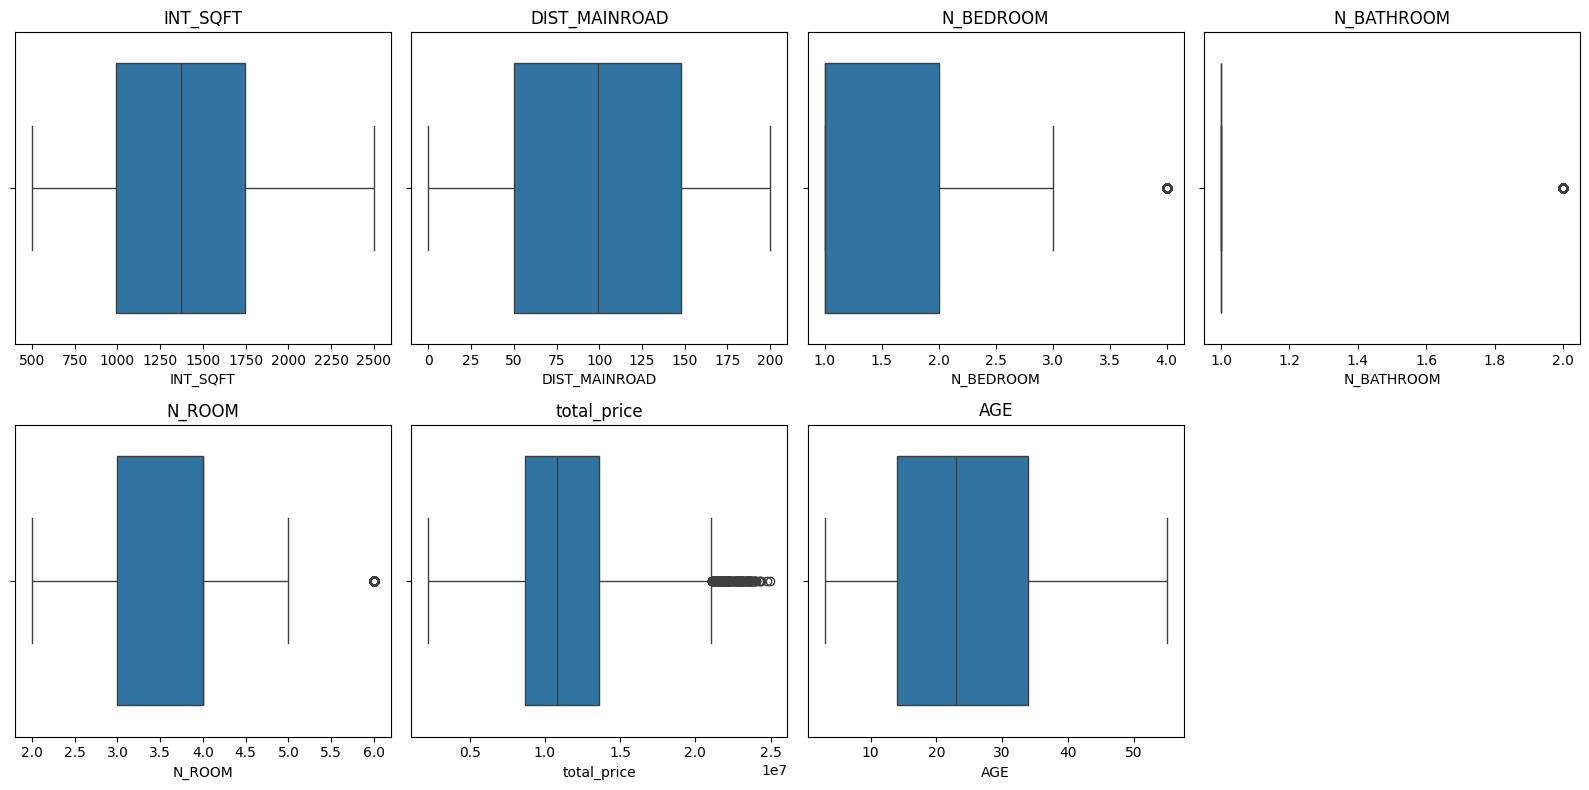

In [21]:
# # Exploratory Data Analysis with Boxplots
columns_to_analyze = ['INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','total_price','AGE']

plt.figure(figsize=(16, 8))

for i, column in enumerate(columns_to_analyze):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df3[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

In [24]:
# Outlier Detection and Data Cleaning
Q1 = df3["total_price"].quantile(0.25)
Q3 = df3["total_price"].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
outlier_mask = (df3["total_price"] < lower_threshold) | (df3["total_price"] > upper_threshold)
df3_cleaned = df3[~outlier_mask]
df4=df3_cleaned.copy()



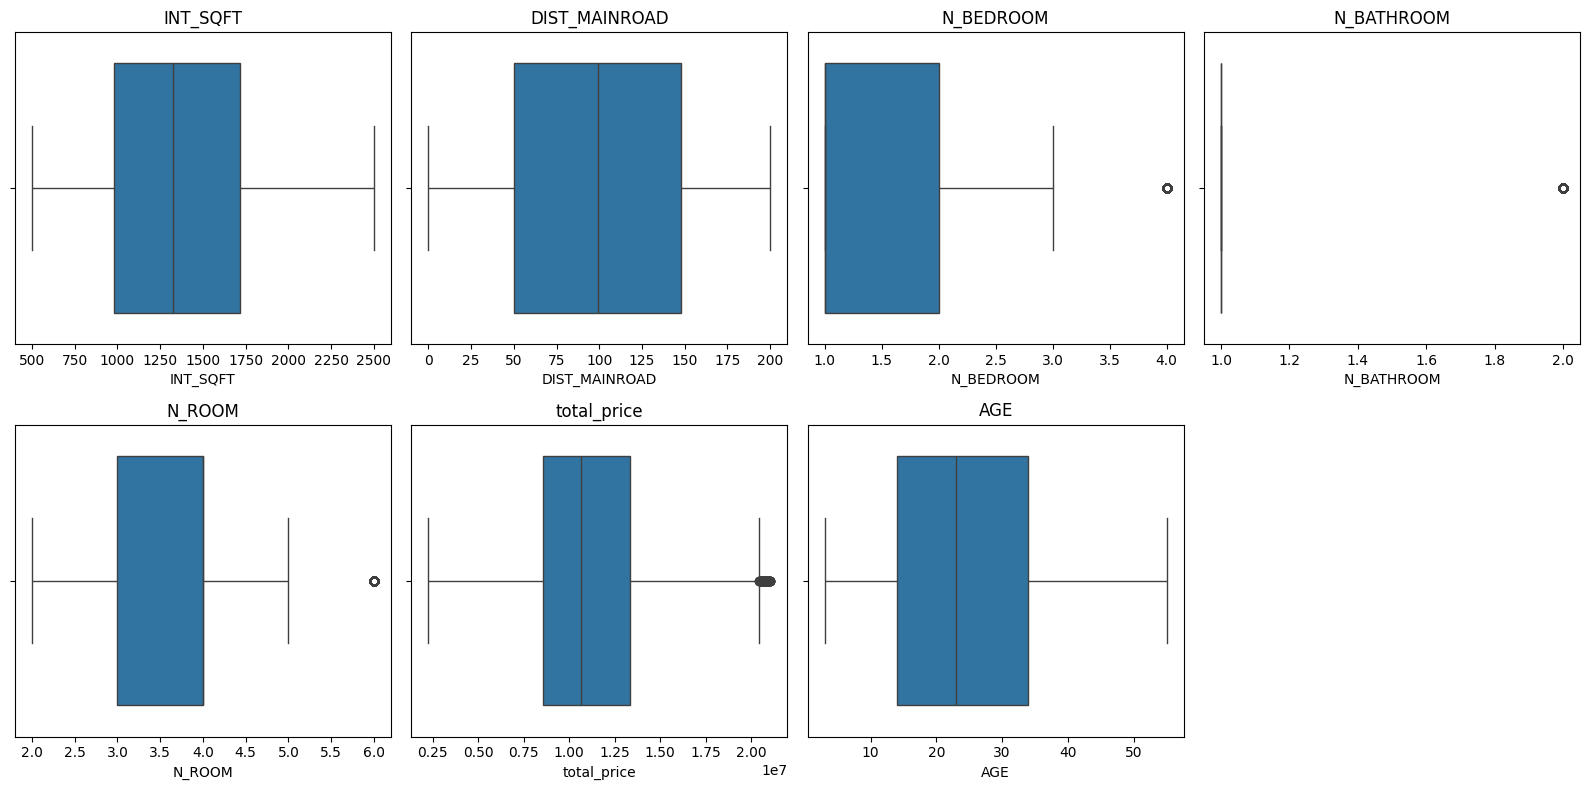

In [25]:
columns_to_analyze = ['INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','total_price','AGE']

plt.figure(figsize=(16, 8))

for i, column in enumerate(columns_to_analyze):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df4[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

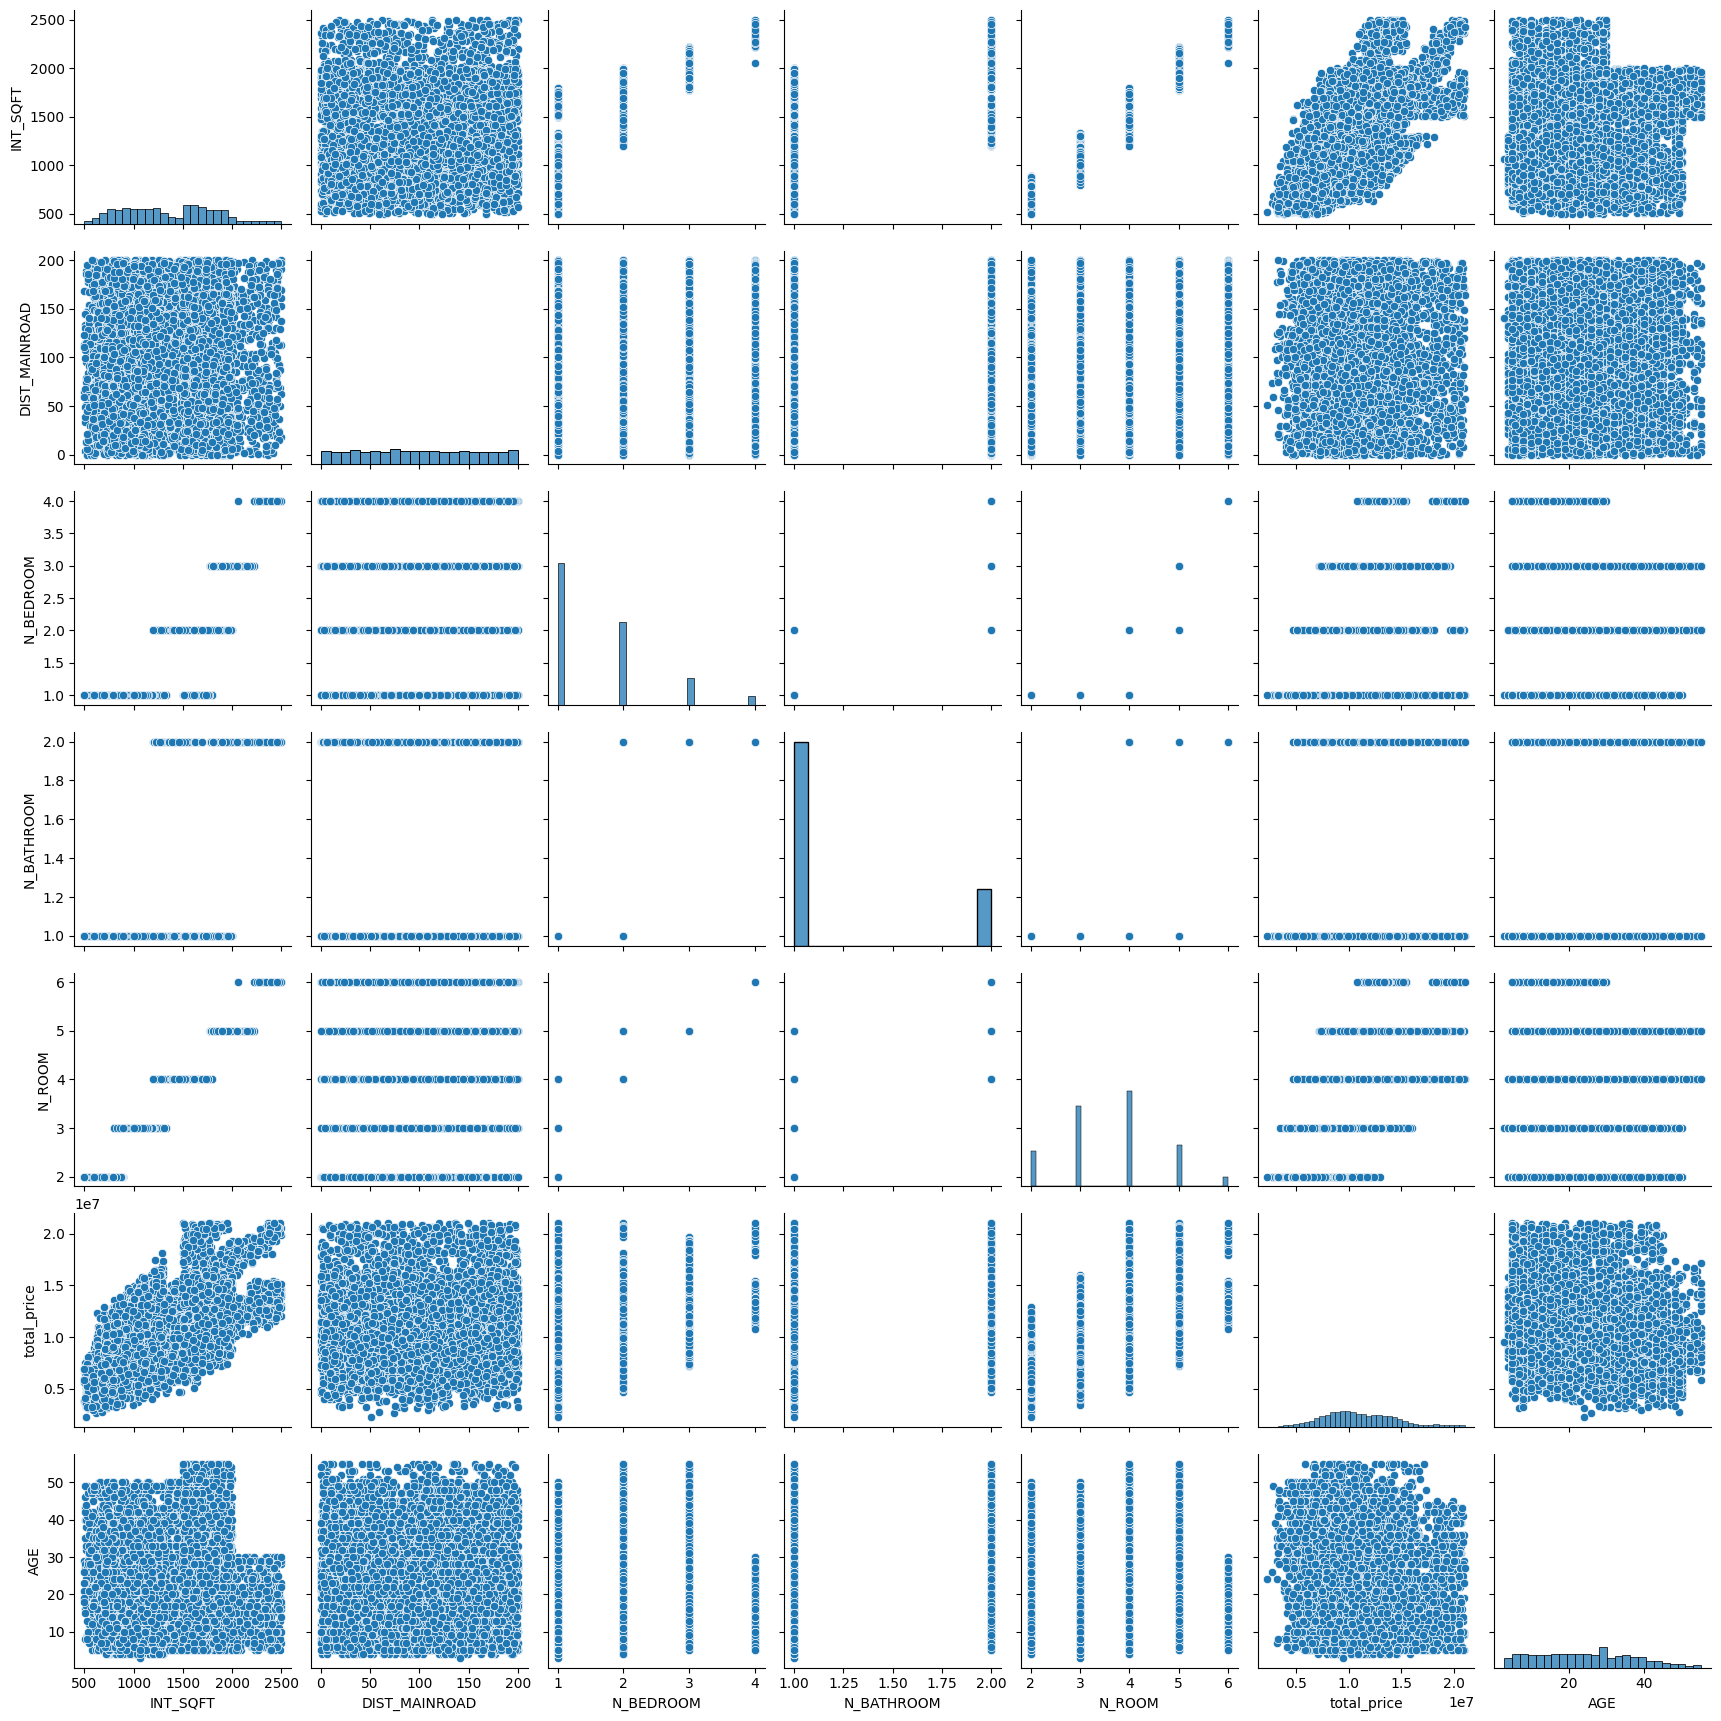

In [26]:
sns.pairplot(df4)
plt.show()

In [27]:
df4.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,total_price,AGE
0,P03210,Karapakam,1004,131,1,1,3,AbNormal,Yes,Commercial,All Pub,Paved,8124400,44
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,13672408,20
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,10063653,22
4,P06210,Karapakam,1226,84,1,1,3,AbNormal,Yes,Others,All Pub,Gravel,7717313,30
5,P00219,Chrompet,1220,36,2,1,4,Partial,No,Commercial,NoSeWa,No Access,13002093,5


2. Pre-processing data


In [28]:
# One-Hot Encoding Categorical Variables
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = ['AREA','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET']
encoded_df = pd.get_dummies(df4[columns_to_encode],dtype=int)
encoded_df.head()

,AREA_Adyar,AREA_Anna Nagar,AREA_Chrompet,AREA_KK Nagar,AREA_Karapakam,AREA_T Nagar,AREA_Velachery,SALE_COND_AbNormal,SALE_COND_Adj Land,SALE_COND_Family,...,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_All Pub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved
0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [29]:
df5=pd.concat([df4,encoded_df],axis=1)
df5.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,...,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,UTILITY_AVAIL_All Pub,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_Gravel,STREET_No Access,STREET_Paved
0,P03210,Karapakam,1004,131,1,1,3,AbNormal,Yes,Commercial,...,1,0,0,1,0,0,0,0,0,1
2,P01812,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,...,1,0,0,0,1,0,0,1,0,0
3,P05346,Velachery,1855,14,3,2,5,Family,No,Others,...,0,0,1,0,0,0,1,0,0,1
4,P06210,Karapakam,1226,84,1,1,3,AbNormal,Yes,Others,...,0,0,1,1,0,0,0,1,0,0
5,P00219,Chrompet,1220,36,2,1,4,Partial,No,Commercial,...,1,0,0,0,0,1,0,0,1,0


3. Processing

In [30]:
df6=df5.copy()
#Train test split
y=df6['total_price']
X=df6.drop(['PRT_ID','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','AREA','total_price'],axis='columns')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9066164368516129

In [31]:
#assess the performance of  Linear Regression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91428282, 0.90398881, 0.9055415 , 0.90690118, 0.91312724])

In [43]:
#find best model with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    # Dictionary containing models and their hyperparameter grids
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    # List to store model scores
    scores = []
    
    # Cross-validator
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    # Iterate through each model and its hyperparameter grid
    for algo_name, config in algos.items():
        # GridSearchCV for the current model
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        
        # Fit the model with grid search
        gs.fit(X, y)
        
        # Append model information and best scores to the scores list
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    # Convert scores list to a DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.91,{'fit_intercept': False}
1,lasso,0.91,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.87,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


3.Results

In [44]:
# Creating a DataFrame to compare actual and predicted values
y_pred = lr_clf.predict(X_test)


out = pd.DataFrame({'Price_actual': y_test, 'Price_pred': y_pred})


result = df6.merge(out, left_index=True, right_index=True)


result[['PRT_ID', 'AREA', 'Price_actual', 'Price_pred']].sample(20)


,PRT_ID,AREA,Price_actual,Price_pred
7073,P07459,Adyar,5950140,5944867.17
323,P00726,Chrompet,10539031,10401281.28
6244,P09453,Chrompet,12193867,13160033.84
152,P05869,Chrompet,10178637,10114440.18
2457,P05656,Chrompet,6844388,7427733.76
4799,P00504,Chrompet,10745433,10691667.29
412,P00204,T Nagar,12739823,12306690.98
1971,P00930,Chrompet,14480622,13252894.16
5764,P00370,T Nagar,20210984,17760328.86
2906,P09179,Adyar,6639258,7471453.58
